# Demo

A record of the short demo shown in COMP90059 S1 2019.

If you're new to Jupyter:

- Shift-Enter to run the code in a cell
- Enter to edit a cell
- Esc to stop editing a cell and enter 'command mode'
- h (when in command mode) to see a list of commands

In [2]:
print(5 + 8)

13


In [3]:
import pandas as pd
import numpy as np

In [4]:
import pandas

In [5]:
# This causes Jupyter to display any matplotlib plots directly in the notebook
# It also works for seaborn, since seaborn uses matplotlib to render plots
# There is an alterative `%matplotlib notebook` magic for interactivity, which we won't use today
# - we will use other libraries for interactive plots
%matplotlib inline
import matplotlib.pyplot as plt

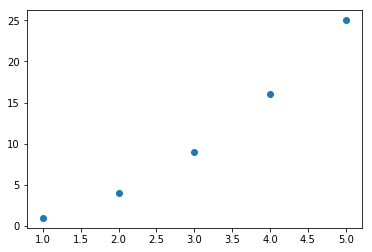

In [6]:
plt.scatter([1,2,3,4,5], [1,4,9,16,25])

In [7]:
import seaborn as sns

In [9]:
import altair as alt
# This line allows Altair to display plots in Jupyter Notebook
# You should not run it if using Jupyter Lab
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [10]:
iris = pd.read_csv('iris.csv')

In [11]:
iris.shape

(150, 5)

In [12]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
type(iris)

pandas.core.frame.DataFrame

In [14]:
type(iris['species'])

pandas.core.series.Series

In [15]:
iris.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [16]:
iris['petal_length'].mean()

3.7580000000000027

In [17]:
iris.loc[3,'petal_length']

1.5

In [18]:
iris.iloc[3,2]

1.5

In [19]:
iris.loc[1:4, ['petal_length','petal_width']]

,petal_length,petal_width
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [20]:
iris.iloc[1:4, [0,1]]

,sepal_length,sepal_width
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1


In [21]:
iris['petal_length'] / iris['petal_width']

0       7.000000
1       7.000000
2       6.500000
3       7.500000
4       7.000000
5       4.250000
6       4.666667
7       7.500000
8       7.000000
9      15.000000
10      7.500000
11      8.000000
12     14.000000
13     11.000000
14      6.000000
15      3.750000
16      3.250000
17      4.666667
18      5.666667
19      5.000000
20      8.500000
21      3.750000
22      5.000000
23      3.400000
24      9.500000
25      8.000000
26      4.000000
27      7.500000
28      7.000000
29      8.000000
         ...    
120     2.478261
121     2.450000
122     3.350000
123     2.722222
124     2.714286
125     3.333333
126     2.666667
127     2.722222
128     2.666667
129     3.625000
130     3.210526
131     3.200000
132     2.545455
133     3.400000
134     4.000000
135     2.652174
136     2.333333
137     3.055556
138     2.666667
139     2.571429
140     2.333333
141     2.217391
142     2.684211
143     2.565217
144     2.280000
145     2.260870
146     2.631579
147     2.6000

In [22]:
sales_wide = pd.read_csv('housing-data-wide1-zeroes.csv')

In [23]:
sales_wide

,property_id,bedrooms,price1,price2
0,5631500400,2,180000.0,-1.0
1,6021501535,3,430000.0,700000.0
2,7129300520,3,221900.0,-1.0


In [24]:
bad_rows = (sales_wide['price2'] == -1)
bad_rows

0     True
1    False
2     True
Name: price2, dtype: bool

In [25]:
sales_wide.loc[bad_rows, 'price2'] = None

In [26]:
sales_wide

,property_id,bedrooms,price1,price2
0,5631500400,2,180000.0,NaN
1,6021501535,3,430000.0,700000.0
2,7129300520,3,221900.0,NaN


In [27]:
sales_wide.dtypes

property_id      int64
bedrooms         int64
price1         float64
price2         float64
dtype: object

In [30]:
?melted.drop

In [35]:
melted = sales_wide.melt(id_vars=['property_id','bedrooms'], value_name='price')
melted

,property_id,bedrooms,variable,price
0,5631500400,2,price1,180000.0
1,6021501535,3,price1,430000.0
2,7129300520,3,price1,221900.0
3,5631500400,2,price2,NaN
4,6021501535,3,price2,700000.0
5,7129300520,3,price2,NaN


In [36]:
# A couple of extra rows added here post-demo:
# Remove the unneeded 'variable' column
melted.drop('variable', axis='columns', inplace=True)
# Remove the rows where price is empty. There are other ways to do this too
# Here ~ applied to a boolean vector means "not"; we are keeping rows where price is not null
melted = melted.loc[~melted['price'].isnull(), :]

melted

,property_id,bedrooms,price
0,5631500400,2,180000.0
1,6021501535,3,430000.0
2,7129300520,3,221900.0
4,6021501535,3,700000.0


In [42]:
# Read in sales dataset with options set on columns

sales = pd.read_csv("housing-data-10000.csv", 
                    usecols=['id','date','price','zipcode','lat','long', 'bedrooms',
                             'waterfront','view','grade','sqft_living','sqft_lot'],
                    parse_dates=['date'], 
                    dtype={'zipcode': 'category',
                           'waterfront': 'bool'})

In [43]:
sales.head()

,id,date,price,bedrooms,sqft_living,sqft_lot,waterfront,view,grade,zipcode,lat,long
0,1446800660,2015-03-16,276500.0,4,1400,6650,False,0,6,98168,47.4888,-122.332
1,1453601502,2015-02-26,303697.0,4,2520,7334,False,0,7,98125,47.7263,-122.291
2,9523103990,2014-12-08,611000.0,3,1850,5000,False,0,7,98103,47.6727,-122.351
3,7308600040,2014-07-23,769995.0,5,3360,12080,False,0,9,98011,47.7757,-122.173
4,1562200240,2014-09-18,550000.0,3,2160,15360,False,0,8,98007,47.6232,-122.138


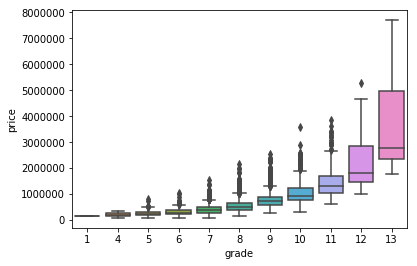

In [47]:
sns.boxplot(data=sales, x='grade', y='price')

/Users/clare/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


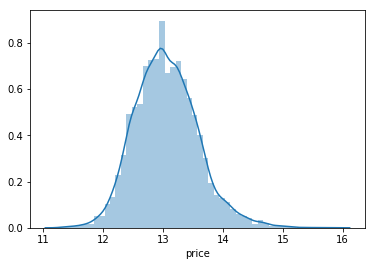

In [50]:
sns.distplot(np.log(sales['price']))

/Users/clare/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


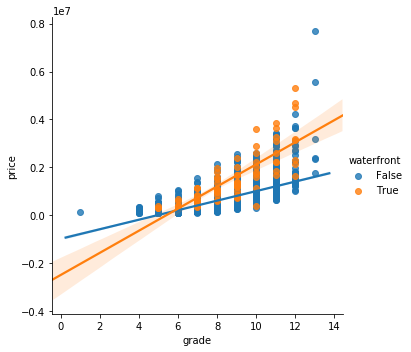

In [51]:
sns.lmplot(data=sales, x='grade', y='price', hue='waterfront')